# SysML v2 Library for STPA

In [104]:
library package LibrarySTPA {
    private import ScalarValues::*;
    private import Views::*;
    doc
    /* This library contains the System-Theoretic Process Analysis (STPA) language extension for SysML v2. 
     * The package is structured according to the four steps of the STPA:
     * 1. Defining the purpose of the analysis
     * 2. Modelling the control structure
     * 3. Identifying unsafe control control actions
     * 4. Identifying loss scenarios
     * In addition, two package are included that help to improve usability of the library:
     * 5. Defines MetaData for relevant STPA types
     * 6. Defines Views and Viewpoints for STPA activities
     */
    package DefineAnalysisPurpose {
        doc
        /* This package contains the elements related to the first step of the STPA. 
         * The first step covers the definition of losses and hazards
         * as the baseline for the analysis.
         */
        occurrence def Loss {
            doc
            /* Definition:
             * Represent the act or fact of being unable to keep or
             * maintain something valued by a stakeholder.
             * Losses may include harm to people, property losses,
             * environmental losses, mission losses, 
             * loss of system performance, reputation losses, or 
             * any other relevant losses determined by the stakeholders. 
             *
             * Model-Based Composition:
             * Loss = <StateOfConcern> & <StakeholderConcern>
             *
             * Example:
             * <Loss of> <life>.
             */
            attribute stateOfConcern : StatesOfConcern;
            ref concern stakeholderConcern;
        }
        occurrence losses [*] : Loss;
        enum def StatesOfConcern {
            'Loss of';
            'Occurrence of';
        }
        occurrence def Hazard {
            doc
            /* Definition:
             * Represents a system state or set of conditions that together with a 
             * particular set of worst-case environmental conditions, will lead to a loss.
             *
             * Model-Based Composition:
             * Hazard = <System> & <UnsafeCondition> & [Losses]
             *
             * Example:
             * <Automated vehicle> <loses control> resulting in [loss of life].
             */
            ref part systemRef [1];
            attribute unsafeCondition [1] : String;
            ref occurrence lossesRef [1..*] : Loss;
        }
        occurrence hazards [*] : Hazard;
    }
    package ModelControlStructure {
        doc
        /* This package contains the elements related to the second step of the STPA. 
         * The second step covers the modelling of the control structure.
         */
        part def ControlStructure {
            doc
            /* Definition:
             * Represents a hierarchical structure that models the layers of control in a system. 
             * Each level imposes constraints on the activities of the levels below, and each level may receive feedback or other information about the levels below. 
             * Control structures model the relationships and interactions between controllers, controlled processes, control actions, feedback, and other information.
             *
             * Example:
             * A control oriented model showing the interactions of an automated vehicle with related systems and people.
             */
            ref part actuatorsRef [*] : Actuator;
            ref part sensorsRef [*] : Sensor;
            ref part processesRef [*] : Process;
            ref part controllersRef [*] : Controller;
            ref flow controlActionsRef [*] : ControlAction;
            ref flow feedbacksRef [*] : Feedback;
            ref flow otherInformationsRef [*] : OtherInformation;
        }
        part controlStructures [*] : ControlStructure;
        part def Controller {
            doc
            /* Definition:
             * Represents an entity that forms beliefs, makes decisions, and provides control actions to achieve or maintain a state or goal.
             *
             * Example:
             * ControlElectronics of an automated vehicle.
             */
            ref part processBeliefs [*] : ProcessModel;
        }
        part controllers [*] : Controller;
        part def HumanController :> Controller {
            doc
            /* Definition:
             * Represents a human that takes over controller related activities.
             *
             * Example:
             * Teleoperator which makes decisions about the operation of an automated vehicle.
             */
            ref part mentalBeliefs [*] : MentalModel;
        }
        part humanControllers [*] : HumanController;
        part def ProcessModel {
            doc
            /* Definition:
             * A representation of a controller's internal beliefs used to make decisions. 
             * Process models may include beliefs about the controlled process or other relevant aspects of the system or the environment. 
             * Process models may be partly updated by feedback used to observe the controlled process.
             *
             * Example:
             * Navigation map used by the ControlElectronics of the automated vehicle. 
             */
        }
        part processModels [*] : ProcessModel;
        part def MentalModel :> ProcessModel {
            doc
            /* Definition:
             * A representation of someone's thought process about how something works in the real world. 
             * It describes the surrounding world, the relationships between its various parts, and a person's intuitive perception about their own acts and consequences.
             *
             * Example:
             * Teleoperator's idea of which vehicle he supervises.
             */
        }
        part mentalModels [*] : MentalModel;
        part def Actuator {
            doc
            /* Definition:
             * Represents an entity in the control structure which executes a control action by a controller.
             *
             * Example:
             * Brake of the automated vehicle.
             */
        }
        part actuators [*] : Actuator;
        part def Sensor {
            doc
            /* Definition:
             * Represents an entitiy in the control structure which provides feedback to a controller.
             *
             * Example:
             * Perception system of automated vehicle.
             */
        }
        part sensors [*] : Sensor;
        part def Process {
            doc
            /* Definition:
             * Represents any process, such as a physical process, a virtual process, a controller, or other processes 
             * that receives control actions from and provides feedback to higher-level controllers in a control structure.  
             * Processes with specified restrictions that bound the performance of its intended behavior.
             *
             * Example:
             * Movement of the automated vehicle.
             */
        }
        part processes [*] : Process;
        flow def ControlAction {
            doc
            /* Definition:
             * Represents a command, instruction, or other directive 
             * provided by a controller to control a process and achieve goals.
             *
             * Example:
             * Teleopartor command.
             */
            end actionSource;
            end actionTarget;
        }
        flow controlActions [*] : ControlAction;
        flow def Feedback {
            doc
            /* Definition:
             * Represents a value, measurement or other information provided to a controller to achieve its goals.
             *
             * Example:
             * Camera images.
             */
            end feedbackSource;
            end feedbackTarget;
        }
        flow feedbacks [*] : Feedback;
        flow def OtherInformation {
            doc
            /* Definition:
             * Represents values that may come from other processes, other controllers, or other sources in the system or the environment.
             *
             * Example:
             * Sunlight from the environment.
             */
            end informationSource;
            end informationTarget;
        }
        flow otherInformation [*] : OtherInformation;
    }
    package IdentifyUCAs {
        doc
        /* This package contains the elements related to the third step of the STPA. 
         * The third step covers the identification of unsafe control actions.
         */
        occurrence def Context {
            doc
            /* Definition:
             * Conditions where a control action may be unsafe.
             * Context can be a state of the system or the state of the operational environment.
             *
             * Example:
             * Environmental Context = A road closure within a one way street.
             * System Context = An automated vehicle is in an emergency state.
             */
            ref occurrence envConRef : EnvironmentalCondition;
            ref occurrence sysConRef : SystemCondition;
        }
        occurrence contexts [*] : Context;
        occurrence def EnvironmentalCondition;
        occurrence environmentalConditions [*] : EnvironmentalCondition;
        occurrence def SystemCondition;
        occurrence systemConditions [*] : SystemCondition;
        enum def TypesOfCA {
            doc
            /* Definition:
             * Represents different types of how a control action can be unsafe.
             *
             * Example:
             * Teleoperator command is NotProvided.
             */
            NotProvided;
            Provided;
            ProvidedIncorrectly;
            ProvidedTooLate;
            ProvidedTooSoon;
            ProvidedOutOfOrder;
        }
        enum typesOfCAs [*] : TypesOfCA;
        occurrence def UnsafeControlAction {
            doc
            /* Definition:
             * Represents a control action that, in a particular context, will lead to a hazard, 
             * and may eventually, given worst-case environmental conditions, lead to losses.
             *
             * Model-Based Composition:
             * UCA = <Source> & <Type> & <ControlAction> & <Receiver> & <Context> & [Hazards]
             *
             * Example:
             * UCA = The <teleoperator> <does not provide> the <operation command> to the <automated vehicle> 
             * <during a complex traffic situation> leading to [H1 - the vehicle not being able to continue its mission].
             */
            ref part sourceRef [1] : ModelControlStructure::Controller, ModelControlStructure::Actuator;
            enum typeRef [1] : TypesOfCA;
            ref flow controlActionRef [1] : ModelControlStructure::ControlAction;
            ref part receiverRef [1] : ModelControlStructure::Process, ModelControlStructure::Controller;
            ref occurrence contextRef [1] : Context;
            ref occurrence hazardsRef [1..*] : DefineAnalysisPurpose::Hazard;
        }
        occurrence unsafeControlActions [*] : UnsafeControlAction;
        occurrence def UnwantedControlAction :> UnsafeControlAction;
        occurrence unwantedControlActions [*] : UnwantedControlAction;
        occurrence def UnsecureControlAction :> UnsafeControlAction;
        occurrence unsecureControlAction [*] : UnsecureControlAction;
    }
    package IdentifyLSs {
        doc
        /* This package contains the elements related to the fourth step of the STPA. 
         * The fourth step covers the identification of loss scenarios. 
         */
        occurrence def CausalFactor {
            doc
            /* Definition:
             * Represents a circumstance, fact, or influence contributing to a causal scenario. 
             * Causal factors can include: interactions, process models, contextual variables, etc.
             *
             * Example:
             * Interaction = <Teleoperator command> & <not forwarded>.
             * Process model = <Awareness of supervised vehicles> & <is incorrect>.
             */
            ref occurrence factorRef [1] : ModelControlStructure::ControlAction, ModelControlStructure::Feedback, ModelControlStructure::ProcessModel,
            ModelControlStructure::MentalModel, IdentifyUCAs::EnvironmentalCondition, IdentifyUCAs::SystemCondition;

            attribute status : String;
        }
        occurrence causalFactors [*] : CausalFactor;
        occurrence def LossScenario {
            doc
            /* Definition:
             * Represents the causal factors that can lead to unsafe control actions and to hazards.
             *
             * Model-Based Composition:
             * LS = <CausalFactors> & [UCAs]
             *
             * Example:
             * <Teleoperator command> & <not forwarded> leading to [UCA1]
             * <Awareness of supervised vehicles> & <is incorrect> leading to [UCA2]  
             */
            ref occurrence causalFactorsRef [1..*] : IdentifyLSs::CausalFactor;
            ref occurrence ucasRef [1..*] : IdentifyUCAs::UnsafeControlAction;
        }
        occurrence lossScenarios [*] : LossScenario;
    }
    package MetaTypesSTPA {
        doc /* This package contains all the meta types for the STPA library elements
         */
        metadata def <loss> :> Metaobjects::SemanticMetadata {
            :>> baseType = DefineAnalysisPurpose::losses meta SysML::OccurrenceUsage;
        }
        metadata def <hazard> :> Metaobjects::SemanticMetadata {
            :>> baseType = DefineAnalysisPurpose::hazards meta SysML::OccurrenceUsage;
        }
        metadata def <controlStructure> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::controlStructures meta SysML::PartUsage;
        }
        metadata def <controller> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::controllers meta SysML::PartUsage;
        }
        metadata def <controllerHuman> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::humanControllers meta SysML::PartUsage;
        }
        metadata def <actuator> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::actuators meta SysML::PartUsage;
        }
        metadata def <sensor> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::sensors meta SysML::PartUsage;
        }
        metadata def <process> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::processes meta SysML::PartUsage;
        }
        metadata def <controlAction> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::controlActions;
        }
        metadata def <feedback> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::feedbacks;
        }
        metadata def <processModel> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::processModels meta SysML::PartUsage;
        }
        metadata def <mentalModel> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::mentalModels meta SysML::PartUsage;
        }
        metadata def <uca> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::unsafeControlActions meta SysML::OccurrenceUsage;
        }
        metadata def <envCon> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::environmentalConditions meta SysML::OccurrenceUsage;
        }
        metadata def <sysCon> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::systemConditions meta SysML::OccurrenceUsage;
        }
        metadata def <context> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::contexts meta SysML::OccurrenceUsage;
        }
        metadata def <cf> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyLSs::causalFactors meta SysML::OccurrenceUsage;
        }
        metadata def <ls> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyLSs::lossScenarios meta SysML::OccurrenceUsage;
        }
    }
    package ViewsAndViewpoints {
        private import MetaTypesSTPA::*;
        doc /* This package contains all the views and viewpoints for the utilization of the STPA library elements
         */
        package DefineAnalysisPurposeViews {
            viewpoint DefineLosses {
                doc /* It should be possible to define and show all losses of the system of interest */
                view def LossTree {
                    doc /* A tree diagram is one possibility to create and manage losses */
                    satisfy DefineLosses;
                    render asTreeDiagram;
                    filter @loss;
                }
            }
            viewpoint DefineHazards {
                doc /* It should be possible to define and show all hazards of the system of interest */
                view def HazardTree {
                    doc /* A tree diagram is one possibility to create and manage hazards */
                    satisfy DefineHazards;
                    render asTreeDiagram;
                    filter @hazard;
                }
            }
            viewpoint MapLossesToHazards {
                doc /* It should be possible to map every loss to at least one hazard */
                view def LossesToHazardsMatrix {
                    doc
                    /* A relationship matrix is one possibility to create and manage relationships 
                     * between losses and hazards */
                    satisfy MapLossesToHazards;
                    filter @hazard or @loss;
                }
            }
        }
        package ModelControlStructureViews {
            viewpoint ModelControlStructure {
                doc
                /* It should be possible to model the control structure with elements 
                 * and interactions of the system of interest */
                view def ControlStructureInterconnection {
                    doc /* An interconnection diagram is one possibility to create and manage a control structure */
                    satisfy ModelControlStructure;
                    render asInterconnectionDiagram;
                    filter @controlStructure or @controller or @controllerHuman or @actuator or @process or @sensor or @controlAction or @feedback or @mentalModel or
                            @processModel;
                }
            }
        }
        package IdentifyUCAsViews {
            viewpoint DefineContext {
                doc /* It should be possible to define the context of the system of interest */
                view def ContextTable {
                    doc /* An element table is one possibility to create and manage the context */
                    satisfy DefineContext;
                    render asElementTable;
                    filter @context;
                }
            }
            viewpoint IdentifyUCAs {
                doc /* It should be possible to identify UCAs for the system of interest */
                view def UCAsTable {
                    doc /* An element table is one possibility to create and manage UCAs */
                    satisfy IdentifyUCAs;
                    render asElementTable;
                    filter @uca;
                }
            }
        }
        package IdentifyLSsViews {
            viewpoint IdentifyLSs {
                doc /* It should be possible to identify LSs for the system of interest */
                view def LSsTable {
                    doc /* An element table is one possibility to create and manage LSs */
                    satisfy IdentifyLSs;
                    render asElementTable;
                    filter @ls;
                }
            }
            viewpoint MapUCAsToLSs {
                doc /* It should be possible to map at least one UCA to each loss scenario */
                view def LSsToUCAsMatrix {
                    doc /* A relationship matrix is one possibility to create and manage relationships between LSs and UCAs */
                    satisfy MapUCAsToLSs;
                    filter @ls or @uca;
                }
            }
        }
    }
}

LibraryPackage LibrarySTPA (5c68f095-57d7-4085-b7b7-7a35919efdb8)


## Library Package 1: First Step of STPA - Define Analysis Purpose

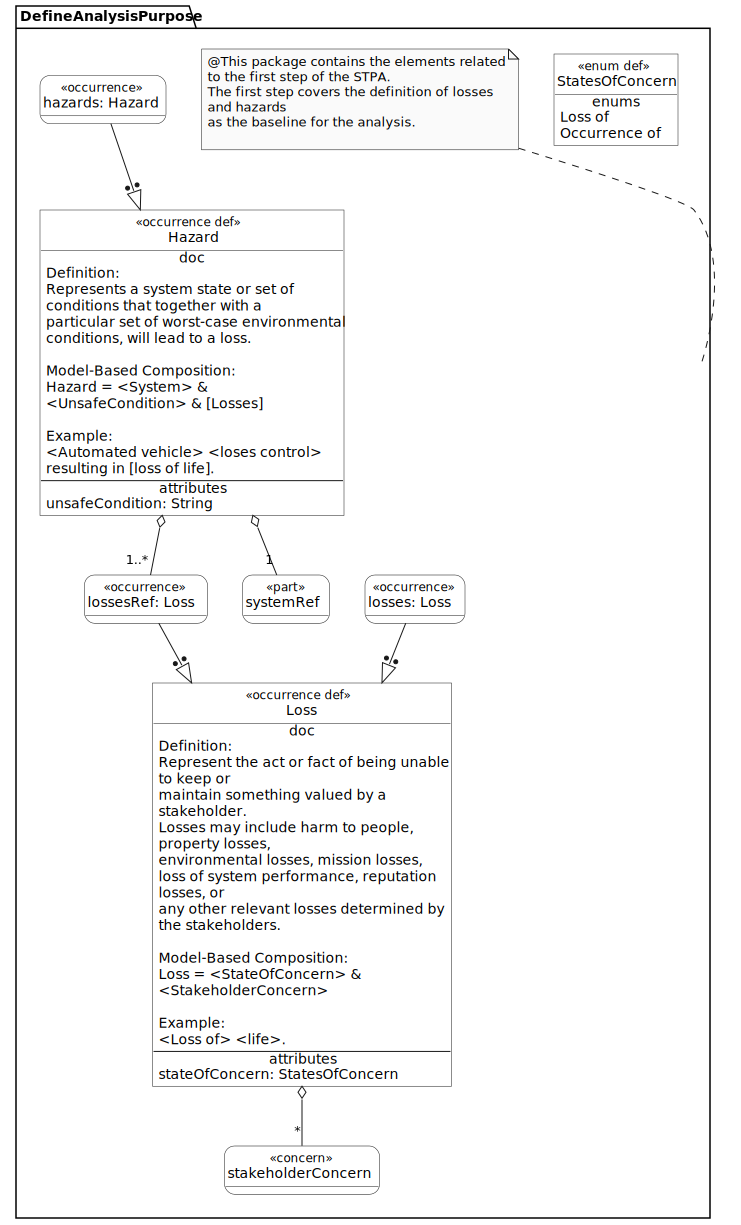

In [105]:
%viz LibrarySTPA::DefineAnalysisPurpose --style=TB

## Library Package 2: Second Step of STPA - Model Control Structure

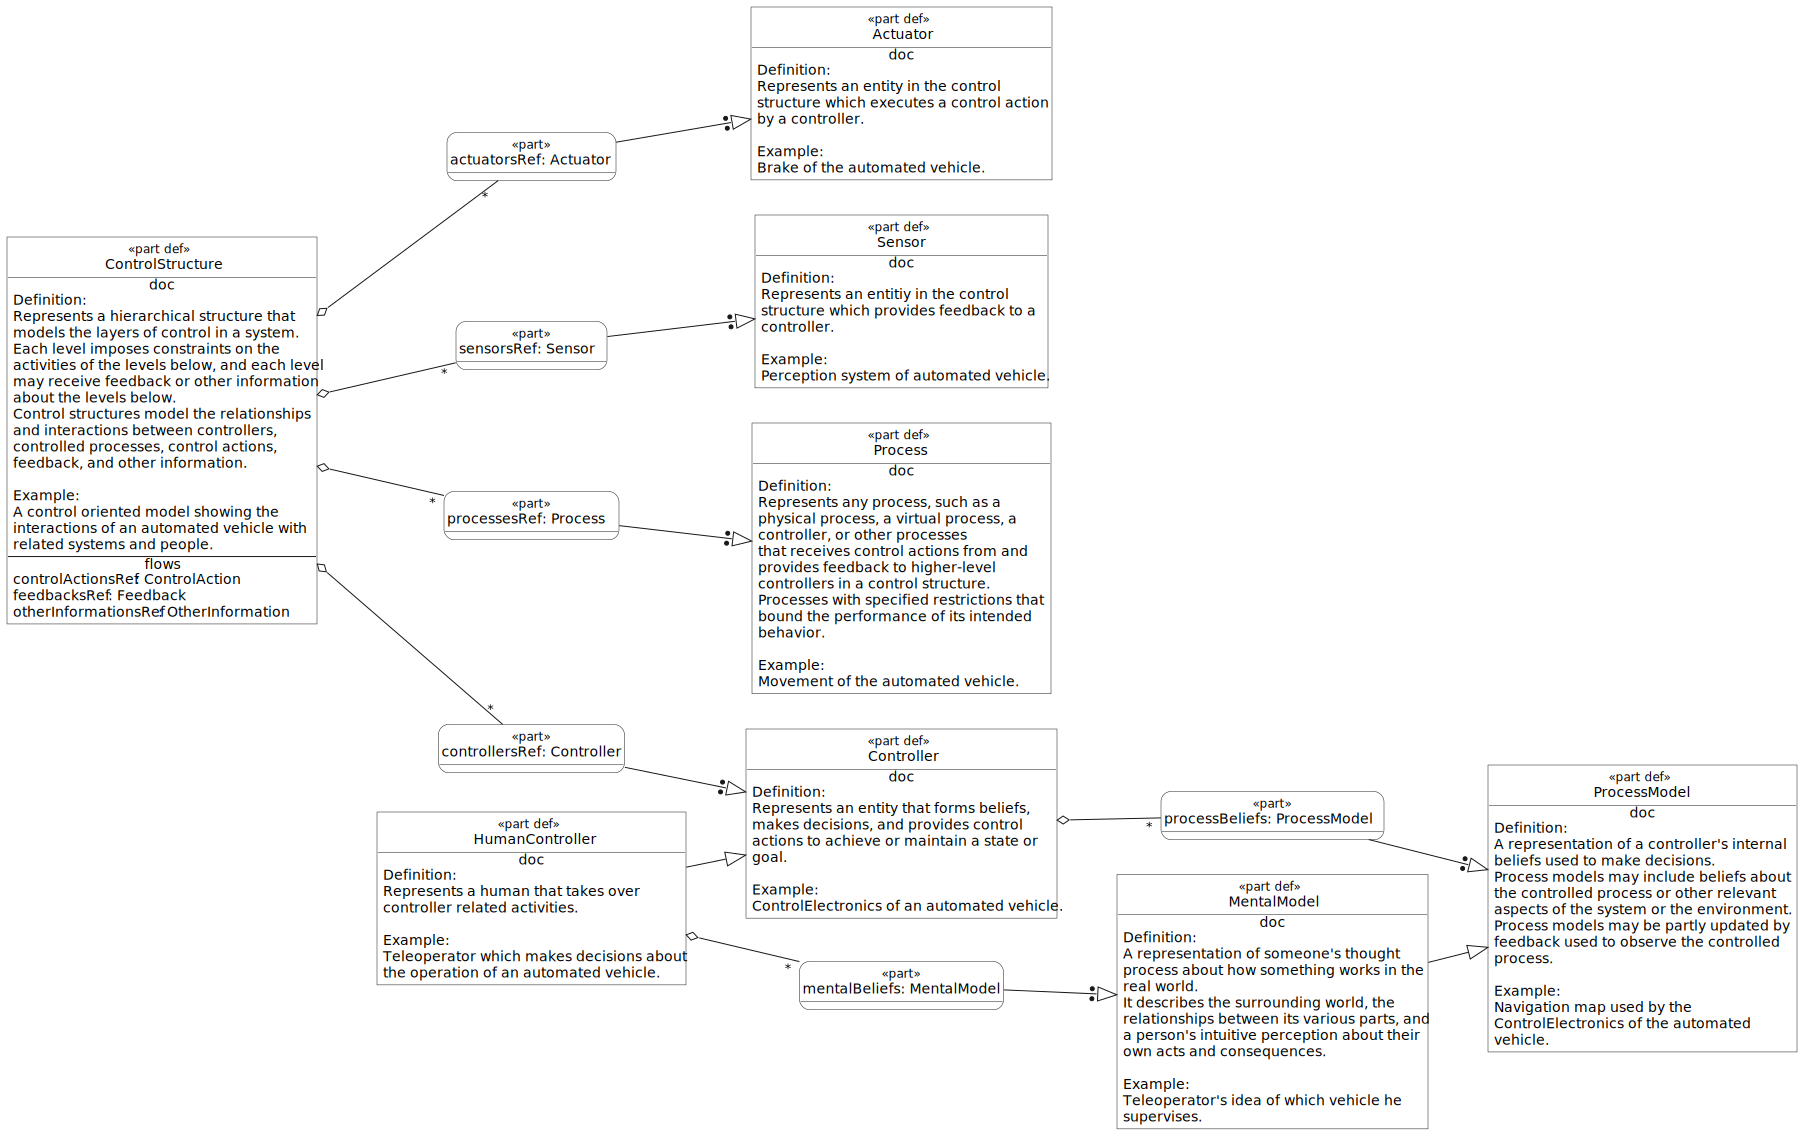

In [106]:
%viz LibrarySTPA::ModelControlStructure::ControlStructure LibrarySTPA::ModelControlStructure::Sensor LibrarySTPA::ModelControlStructure::Actuator LibrarySTPA::ModelControlStructure::Controller LibrarySTPA::ModelControlStructure::Process LibrarySTPA::ModelControlStructure::ProcessModel LibrarySTPA::ModelControlStructure::MentalModel LibrarySTPA::ModelControlStructure::HumanController --style LR

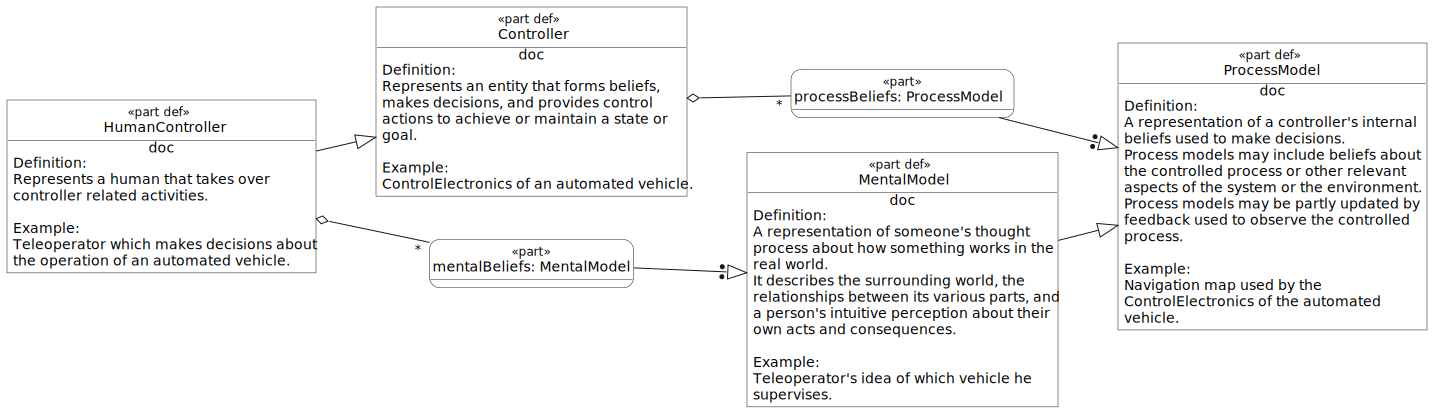

In [107]:
%viz LibrarySTPA::ModelControlStructure::ProcessModel LibrarySTPA::ModelControlStructure::MentalModel LibrarySTPA::ModelControlStructure::Controller LibrarySTPA::ModelControlStructure::HumanController --style LR

## Library Package 3: Third Step of STPA - Identify UCAs

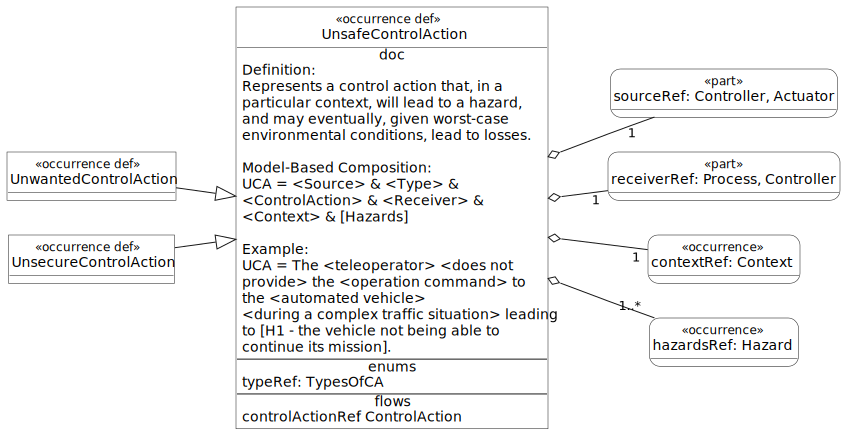

In [108]:
%viz LibrarySTPA::IdentifyUCAs::UnsafeControlAction LibrarySTPA::IdentifyUCAs::UnwantedControlAction LibrarySTPA::IdentifyUCAs::UnsecureControlAction --style LR

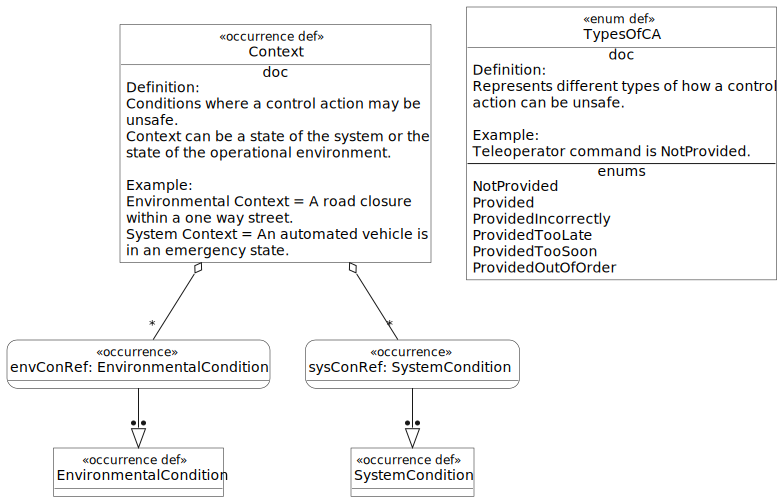

In [109]:
%viz LibrarySTPA::IdentifyUCAs::Context LibrarySTPA::IdentifyUCAs::EnvironmentalCondition LibrarySTPA::IdentifyUCAs::SystemCondition LibrarySTPA::IdentifyUCAs::TypesOfCA

## Library Package 4: Fourth Step of STPA - Identify LSs

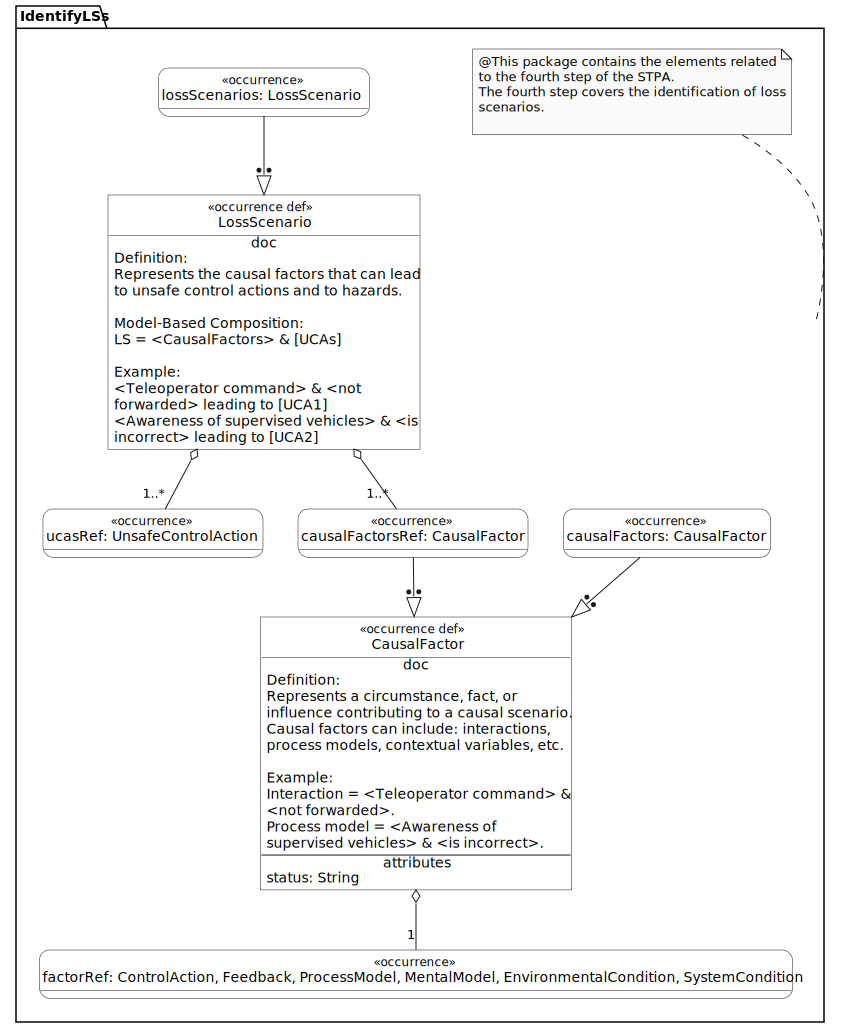

In [110]:
%viz LibrarySTPA::IdentifyLSs --style=TB

## Library Package 5: MetaData Types for STPA

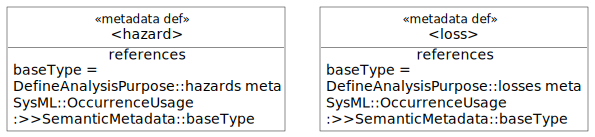

In [111]:
%viz LibrarySTPA::MetaTypesSTPA::hazard LibrarySTPA::MetaTypesSTPA::loss

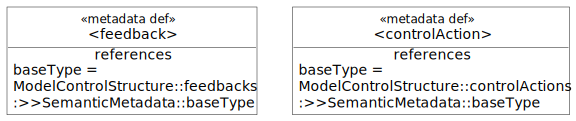

In [112]:
%viz LibrarySTPA::MetaTypesSTPA::feedback LibrarySTPA::MetaTypesSTPA::controlAction

## Library Package 6: Views and Viewpoints for STPA

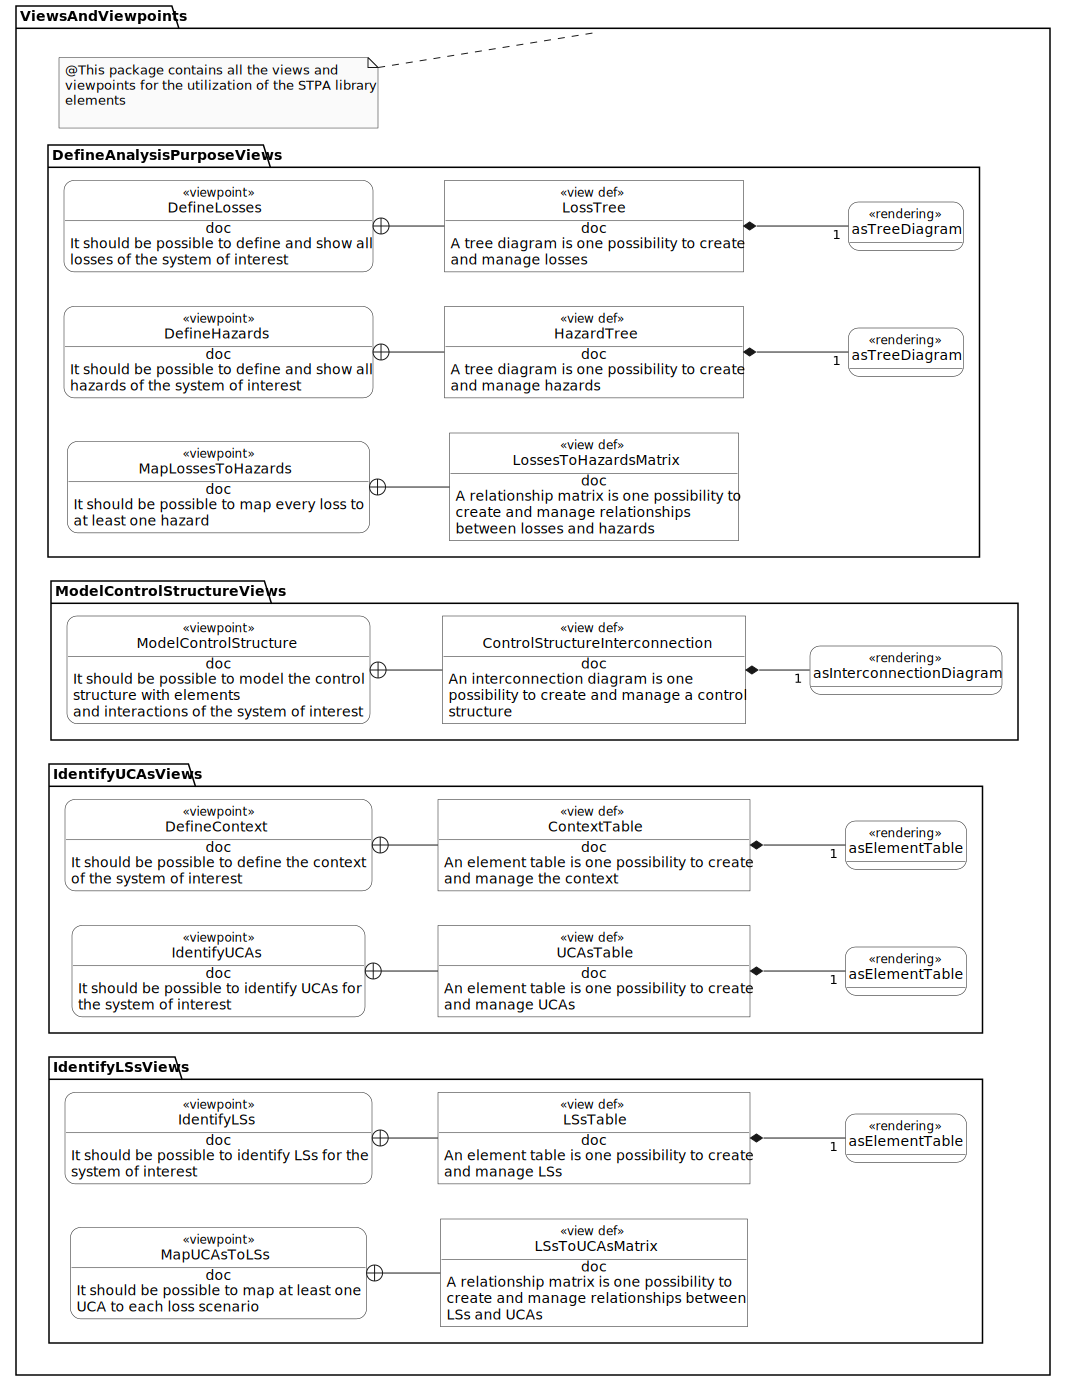

In [113]:
%viz LibrarySTPA::ViewsAndViewpoints --style LR

# Example Application of STPA Library

In [114]:
package PaperExample {
    private import LibrarySTPA::DefineAnalysisPurpose::*;
    private import LibrarySTPA::ModelControlStructure::*;
    private import LibrarySTPA::IdentifyUCAs::*;
    private import LibrarySTPA::IdentifyLSs::*;
    private import LibrarySTPA::MetaTypesSTPA::*;
    private import LibrarySTPA::ViewsAndViewpoints::DefineAnalysisPurposeViews::*;
    package DefineAnalysisPurpose {
        package Stakeholders {
            part def Passenger;
            part def Manufacturer;
            part def Operator;
            concern Safety {
                subject Ushift;
                stakeholder : Passenger;
                stakeholder : Manufacturer;
                stakeholder : Operator;
            }
            concern Reputation {
                subject Ushift;
                stakeholder : Manufacturer;
                stakeholder : Operator;
            }
        }
        package Losses {
            #loss occurrence LossOfCustomerSatisfaction {
                :>> stakeholderConcern = Stakeholders::Reputation;
            }
            #loss occurrence LossOfLife {
                :>> stakeholderConcern = Stakeholders::Safety;
            }
        }
        package Hazards {
            #hazard occurrence VehicleCanNotExecuteMission {
                :>> lossesRef = Losses::LossOfCustomerSatisfaction;
            }
            #hazard occurrence VehicleTooCloseToPeople {
                :>> lossesRef = Losses::LossOfLife;
            }
        }
    }
    package ModelControlStructure {
        #controlStructure part UshiftCS {
            :>> controllersRef = (Ushift.ControlElectronics, Teleoperator, Passenger, OtherTraffic, VRUs, Environment);
            :>> actuatorsRef = Ushift.DriveSystem;
            :>> sensorsRef = Ushift.PerceptionSystem;
            :>> processesRef = VehicleMovement;
            :>> controlActionsRef = (teleoperatorCMD, maneuverCMD, vehicleForces, travelCMD);
            :>> feedbacksRef = (vehiclePerception, vehicleMovement, vehicleHealth, vehicleStatus, roadPerception, vruPerception, otherTrafficPerception);
            #controller part Ushift {
                #controller part ControlElectronics {
                    :>> processBeliefs = (VehicleLimitations, OperationalMode, UnderstandingOfPassengerBehavior, AssumptionAboutRoadInfrastructure, PassengerCapacity);
                    #processModel part VehicleLimitations;
                    #processModel part OperationalMode;
                    #processModel part UnderstandingOfPassengerBehavior;
                    #processModel part AssumptionAboutRoadInfrastructure;
                    #processModel part PassengerCapacity;
                }
                #sensor part PerceptionSystem;
                #actuator part DriveSystem;
            }
            #controllerHuman part Teleoperator {
                :>> mentalBeliefs = CurrentWorkload;
                #mentalModel part CurrentWorkload;
            }
            #controllerHuman part Passenger {
                :>> mentalBeliefs = UnderstandingOfVehicleBehavior;
                #mentalModel part UnderstandingOfVehicleBehavior;
            }
            #controller part OtherTraffic;
            #controller part VRUs;
            #controller part Environment;
            #process part VehicleMovement;
            #controlAction flow teleoperatorCMD from UshiftCS.Teleoperator to UshiftCS.Ushift.ControlElectronics;
            #feedback flow vehicleHealth from Ushift.ControlElectronics to UshiftCS.Teleoperator;
            #feedback flow vehicleStatus from Ushift.ControlElectronics to UshiftCS.Passenger;
            #controlAction flow maneuverCMD from Ushift.ControlElectronics to Ushift.DriveSystem;
            #controlAction flow vehicleForces from Ushift.DriveSystem to UshiftCS.VehicleMovement;
            #feedback flow vehicleMovement from UshiftCS.VehicleMovement to Ushift.PerceptionSystem;
            #feedback flow roadPerception from UshiftCS.Environment to Ushift.PerceptionSystem;
            #feedback flow vruPerception from UshiftCS.VRUs to Ushift.PerceptionSystem;
            #feedback flow otherTrafficPerception from UshiftCS.OtherTraffic to Ushift.PerceptionSystem;
            #feedback flow vehiclePerception from Ushift.PerceptionSystem to Ushift.ControlElectronics;
            #controlAction flow travelCMD from UshiftCS.Passenger to Ushift.ControlElectronics;
            doc /* This shows a simplified control structure of DLR's Ushift concept vehicle using the defined element types of the SysML v2 library for SysML v2*/
        }
    }
    package IdentifyUCAs {
        package Contexts {
            #context occurrence EmergencyStateDueToClosedOneWayStreet {
                :>> systemConditions = EmergencyState;
                :>> environmentalConditions = ClosedOneWayStreet;
            }
            #sysCon occurrence EmergencyState;
            #envCon occurrence ClosedOneWayStreet;
        }
        package UCAs {
            #uca occurrence TeleoperatorDoesNotProvideOperationCommand {
                doc /* Teleoperator does not provide operation command when the automated vehicle is in an emergency situation */
                :>> sourceRef = ModelControlStructure::UshiftCS.Teleoperator;
                :>> controlActionRef = ModelControlStructure::UshiftCS.teleoperatorCMD;
                :>> typeRef = typesOfCAs.NotProvided;
                :>> receiverRef = ModelControlStructure::UshiftCS.Ushift.ControlElectronics;
                :>> contextRef = Contexts::EmergencyStateDueToClosedOneWayStreet;
                :>> hazardsRef = DefineAnalysisPurpose::Hazards::VehicleCanNotExecuteMission;
            }
        }
    }
    package IdentifyLSs {
        package CausalFactors {
            #cf occurrence TeleoperatorNotInformed {
                :>> factorRef = ModelControlStructure::UshiftCS.vehicleStatus;
                attribute :>> status = "not forwarded";
            }
        }
        package LossScenarios {
            #ls occurrence TeleoperatorNotAwareOfVehiclesEmergencySituation {
                doc /* The automated vehicle drives into a one way street which is closed and can not resolve the situation. However, the teleoperator is not aware that he is responsible for the vehicle. As a result, the teleoperator does not provide a resolving operation command */
                :>> causalFactorsRef = CausalFactors::TeleoperatorNotInformed;
                :>> ucasRef = IdentifyUCAs::UCAs::TeleoperatorDoesNotProvideOperationCommand;
            }
        }
    }
    package Views {
        //private import CameoViewsSTPA::**;
        //view HazardsAndLosses : HazardsTable {
        //    expose PaperExample::DefineAnalysisPurpose::**;
        //    filter @hazard;
        //}
        //view UCAs : UCAsTable {
        //    expose PaperExample::IdentifyUCAs::**;
        //    filter @uca;
        //}
        //view LSs : LSsTable {
        //    expose PaperExample::IdentifyLSs::**;
        //    filter @ls;
        //}
        view ShowLosses : DefineLosses::LossTree {
            expose DefineAnalysisPurpose::Losses::*;
        }
    }
}

Package PaperExample (7ab55e3a-ad8e-44b2-a18f-e5ffea3fb7f7)


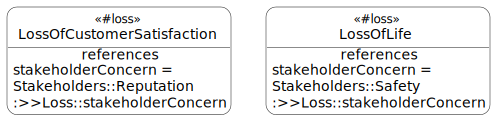

In [115]:
%view PaperExample::Views::ShowLosses --style=hidemetadata

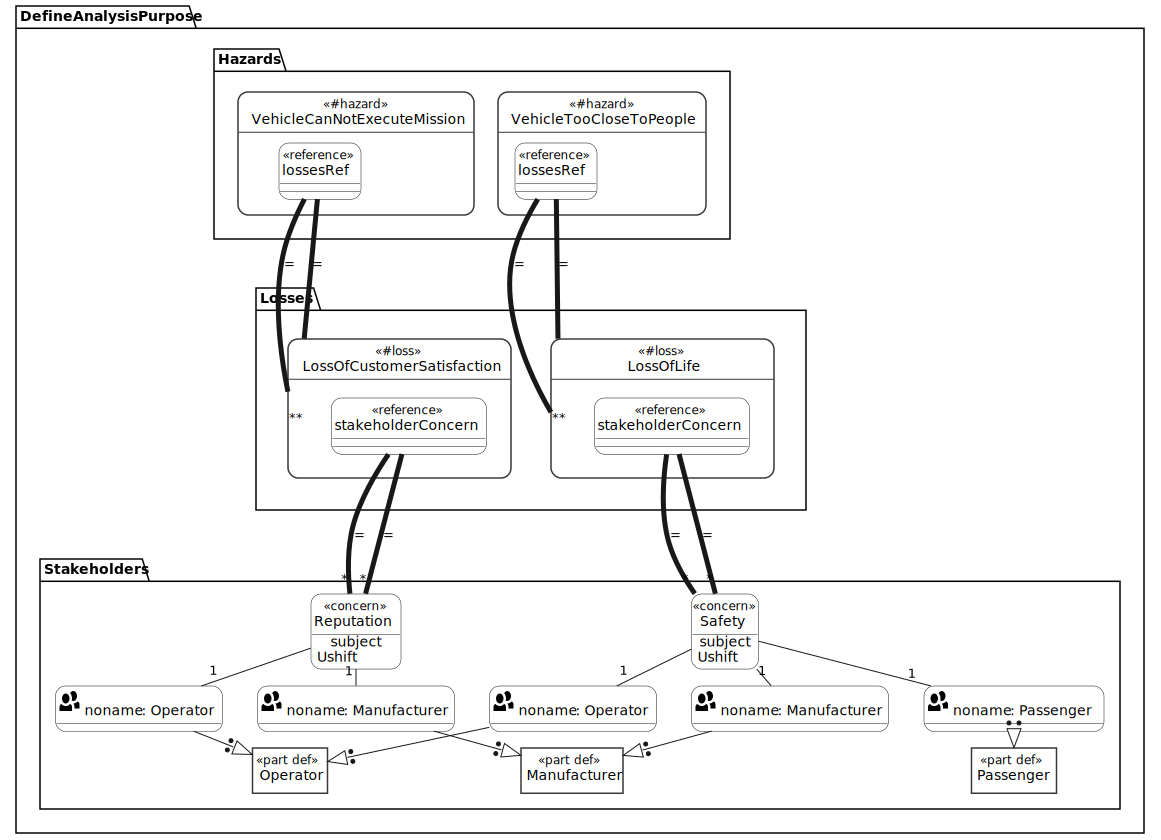

In [116]:
%viz PaperExample::DefineAnalysisPurpose --view interconnection --style hidemetadata --style=TB

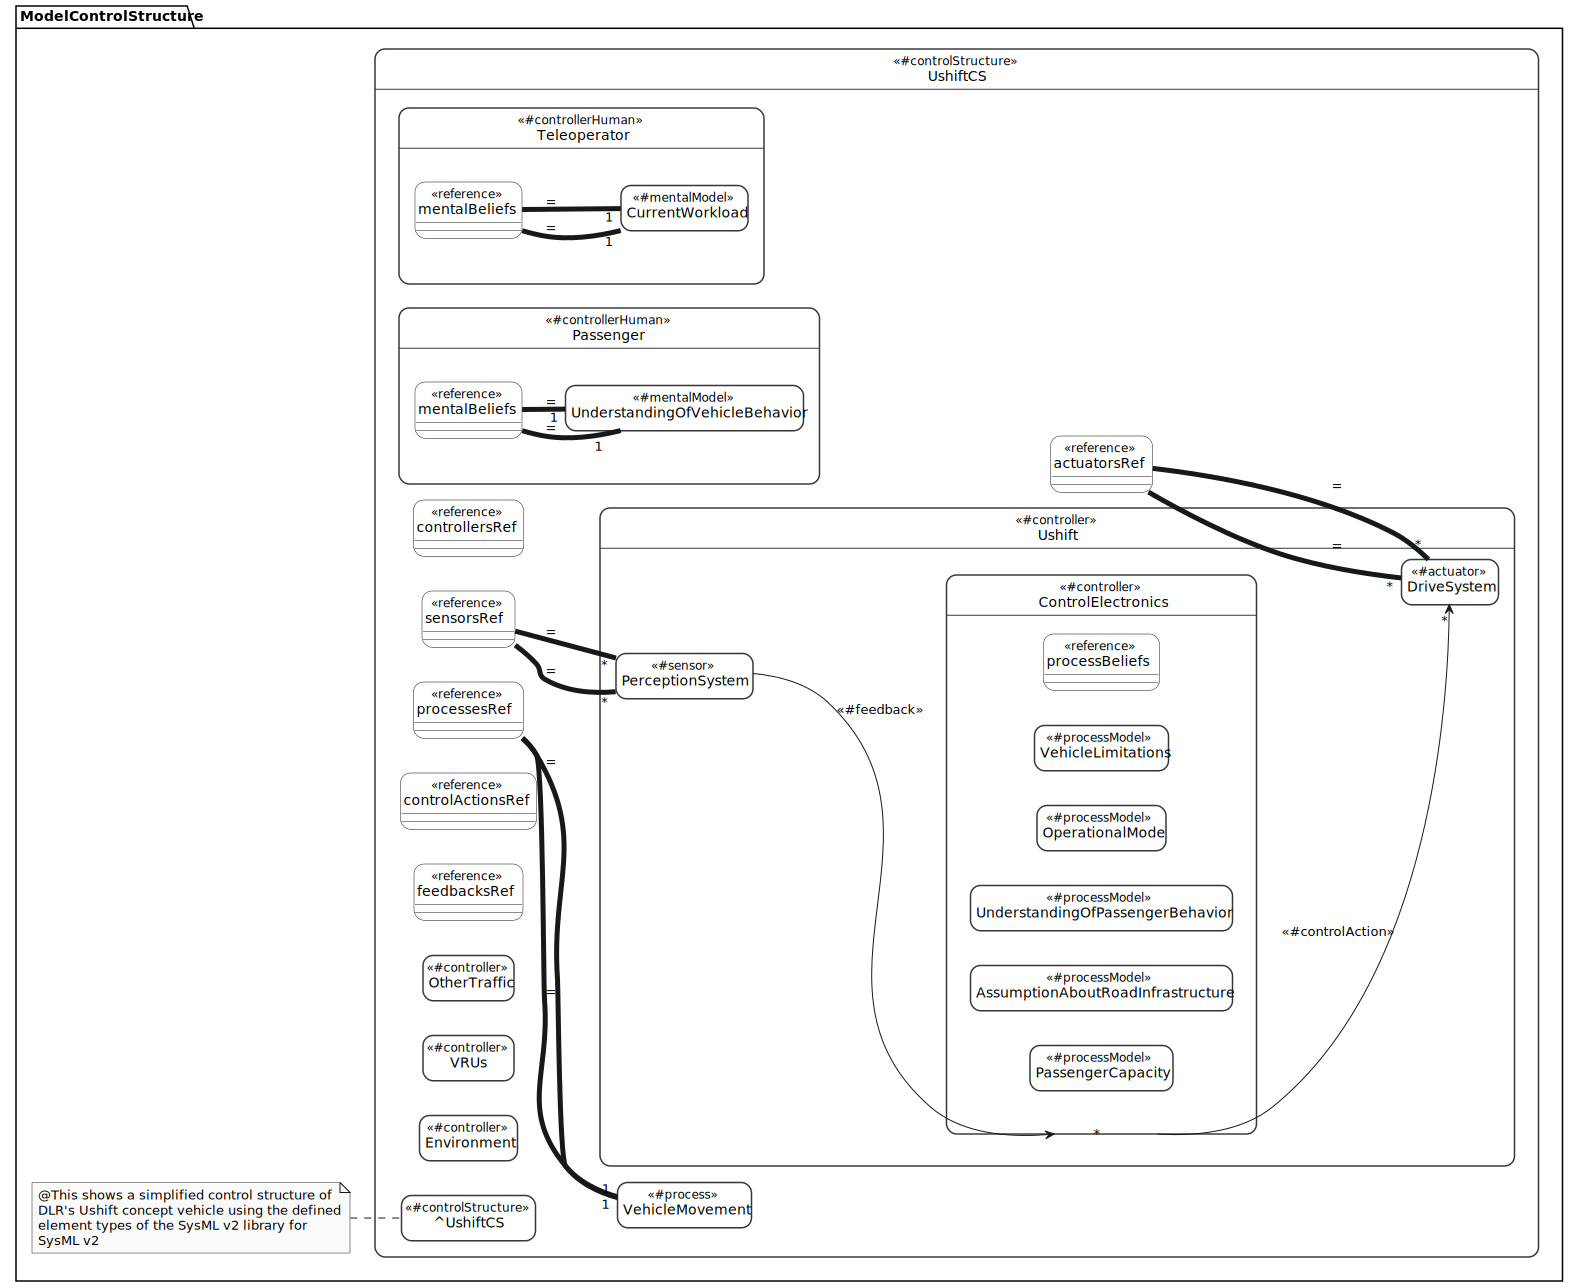

In [117]:
%viz PaperExample::ModelControlStructure --view interconnection --style hidemetadata --style=LR

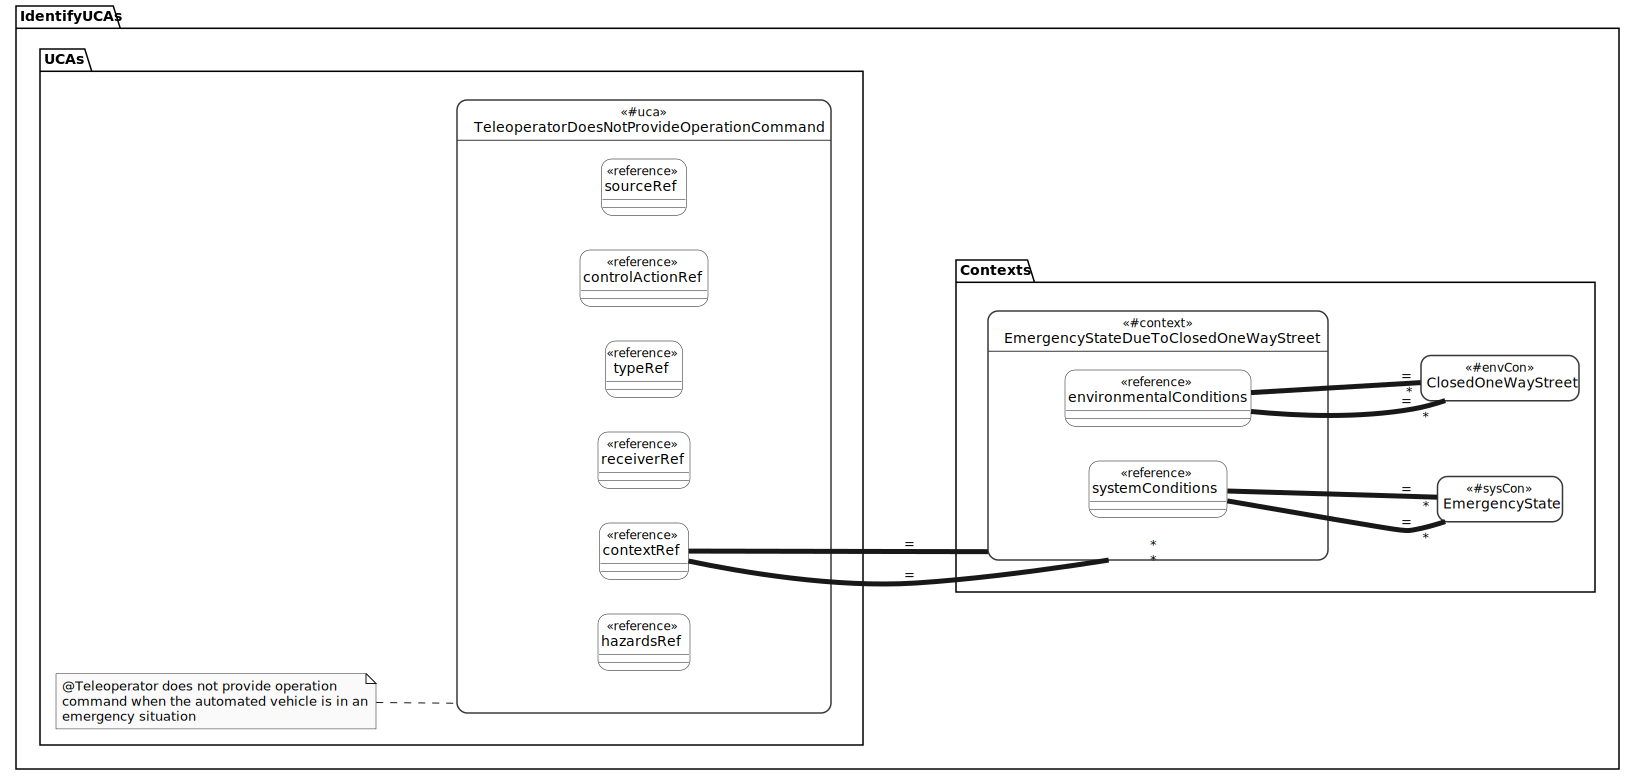

In [118]:
%viz PaperExample::IdentifyUCAs --style=LR --style=hidemetadata

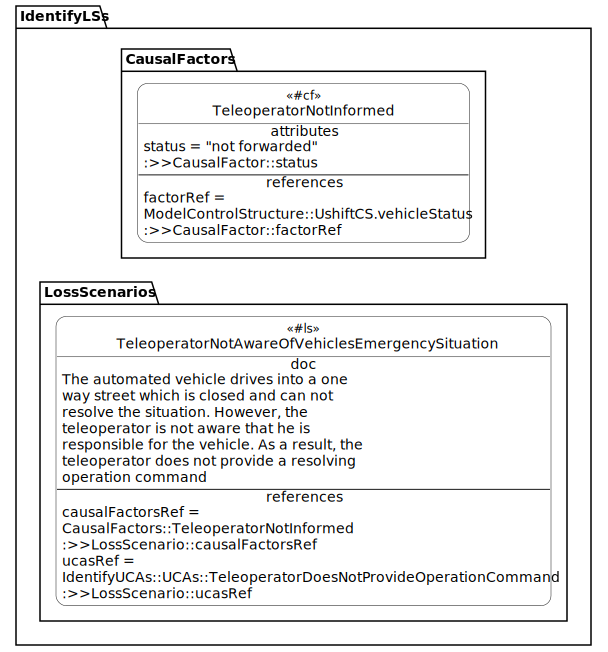

In [119]:
%viz PaperExample::IdentifyLSs --view=tree --style=LR --style=hidemetadata

## Overview of Library Packages

In [120]:
library package LibraryPackagesSTPA {
    package '6. ViewsAndViewpoints' {
        doc /* 
            This package contains
            all the views and 
            viewpoints for the 
            utilization of the 
            STPA library elements
        */
    }
    package '5. MetaDataSTPA' {
        doc /* 
            This package contains 
            all the meta types for 
            the STPA library elements
        */    
    }
    package '4. IdentifyLSs' {
        doc /* 
            This package contains 
            the elements related to
            the fourth step of the STPA.
            The fourth step covers
            the identification of 
            loss scenarios.
        */
    }
    package '3. IdentifyUCAs' {
        doc /* 
            This package contains
            the elements related to 
            the third step of the STPA.
            The third step covers 
            the identification of 
            unsafe control actions.
        */   
    }
    package '2. ModelControlStructure' {
        doc /* 
            This package contains 
            the elements related to 
            the second step of the STPA.
            The second step covers 
            the modelling of the
            control structure.
        */ 
    }
    package '1. DefineAnalysisPurpose' {
        doc /*  
            This package contains 
            the elements related to 
            the first step of the STPA. 
            The first step covers 
            the definition of losses 
            and hazards as the 
            baseline for the analysis.
        */
    }
    
}

LibraryPackage LibraryPackagesSTPA (32715bb3-efbc-40b9-8b97-e8be89c22fb8)


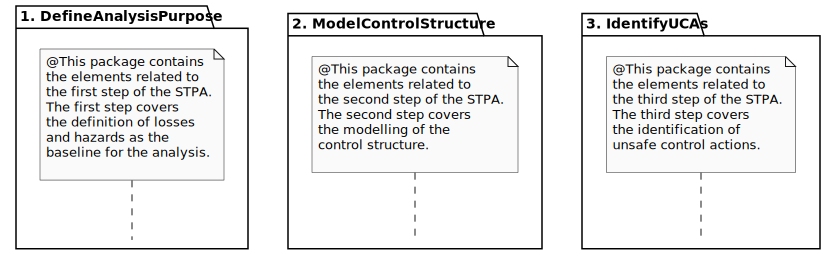

In [121]:
%viz LibraryPackagesSTPA::"1. DefineAnalysisPurpose" LibraryPackagesSTPA::"2. ModelControlStructure" LibraryPackagesSTPA::"3. IdentifyUCAs"

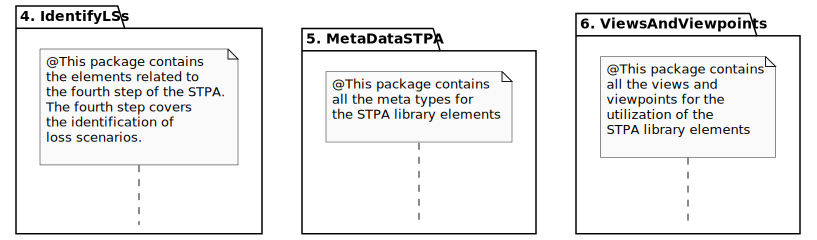

In [122]:
%viz LibraryPackagesSTPA::"4. IdentifyLSs" LibraryPackagesSTPA::"5. MetaDataSTPA" LibraryPackagesSTPA::"6. ViewsAndViewpoints"

# Helpful Commands

In [123]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [124]:
%view -h

Usage: %view [--render=<RENDERING>] [--style=<STYLE>...] <NAME>

Render the view specified by the view usage <NAME>. <NAME> must be fully qualified.
If the view usage has a rendering, this overrides the rendering given in the render option.

<RENDERING> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Sho

In [125]:
%publish -h

Usage: %publish <NAME>

Publish the model elements rooted in <NAME> to the repository. <NAME> must be fully qualified.
